In [1]:
import numpy as np
import os
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(400)


2024-09-12 12:11:21.124949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Function to load test data from files
def load_test_data(test_folder):
    X_test = []
    y_test = []

    test_files = [f for f in os.listdir(test_folder) if f.endswith('_X.npy')]

    for test_file in test_files:
        base_name = test_file.replace('_X.npy', '')
        X = np.load(os.path.join(test_folder, base_name + '_X.npy'))
        y = np.load(os.path.join(test_folder, base_name + '_y.npy'))

        X_test.append(X)
        y_test.append(y)

    return np.concatenate(X_test), np.concatenate(y_test)

In [3]:
# Function to apply post-processing to the predictions
def post_process_predictions(predictions):
    for a in range(predictions.shape[1]):
        for j in range(2, predictions.shape[0] - 3):
            if predictions[j-1, a] == 1 and predictions[j, a] == 0 and predictions[j+1, a] == 0 and predictions[j+2, a] == 1:
                predictions[j, a] = 1
                predictions[j+1, a] = 1
            if predictions[j-2, a] == 0 and predictions[j-1, a] == 0 and predictions[j, a] == 1 and predictions[j+1, a] == 1 and predictions[j+2, a] == 0 and predictions[j+3, a] == 0:
                predictions[j, a] = 0
                predictions[j+1, a] = 0
            if predictions[j-1, a] == 0 and predictions[j, a] == 1 and predictions[j+1, a] == 0 and predictions[j+2, a] == 0:
                predictions[j, a] = 0
            if predictions[j-1, a] == 1 and predictions[j, a] == 0 and predictions[j+1, a] == 1 and predictions[j+2, a] == 1:
                predictions[j, a] = 1
    return predictions


In [4]:

# Function to evaluate the model on the test data
def evaluate_model(model, X_test, y_test, apply_post_processing=True):
    # Make predictions
    predictions = model.predict(X_test)
    predictions = np.round(predictions)  # Round to binary 0 or 1

    # Apply post-processing if needed
    if apply_post_processing:
        predictions = post_process_predictions(predictions)

    # Flatten the predictions and ground truth for metric calculation
    predictions_flat = predictions.flatten()
    y_test_flat = y_test.flatten()

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_flat, predictions_flat)
    precision = precision_score(y_test_flat, predictions_flat, average='macro')
    recall = recall_score(y_test_flat, predictions_flat, average='macro')
    f1 = f1_score(y_test_flat, predictions_flat, average='macro')

    # Print the metrics
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Return the predictions and metrics
    return predictions, {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}



In [5]:
import matplotlib.pyplot as plt

# Function to plot predictions vs ground truth
def plot_results(predictions, y_test):
    plt.figure(figsize=(12, 8))

    # Plot predictions
    plt.subplot(2, 1, 1)
    plt.title('Predictions (Post-Processed)')
    plt.imshow(predictions.T, cmap='Greys', aspect='auto')

    # Plot ground truth
    plt.subplot(2, 1, 2)
    plt.title('Ground Truth')
    plt.imshow(y_test.T, cmap='Greys', aspect='auto')

    plt.show()


2344/2344 [==============================] - 32s 14ms/step
Accuracy: 95.66%
Precision: 0.7800
Recall: 0.7144
F1-Score: 0.7422


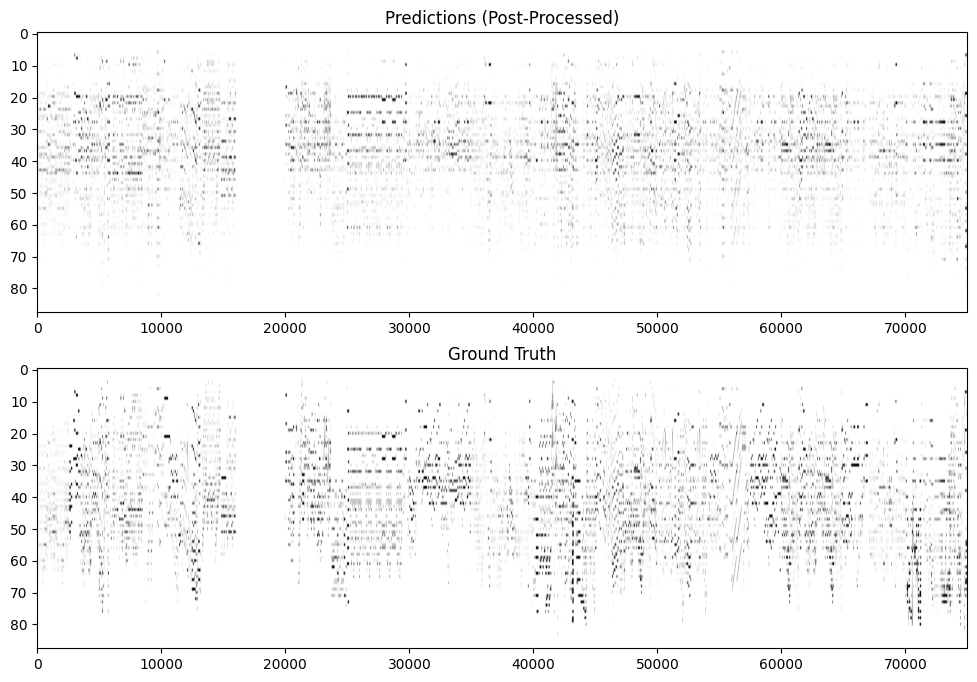

In [7]:
test_folder = '/root/dev/data/paper_split/test_set1'
model_path = '/root/dev/Deep-Neural-Networks-for-Piano-Music-Transcription/Saved_weights/DNN_3L/weights.hdf5'
# 1. Load test data
X_test, y_test = load_test_data(test_folder)

# 2. Load model
model = load_model(model_path)

# 3. Evaluate model
predictions, metrics = evaluate_model(model, X_test, y_test, apply_post_processing=True)

# 4. Plot results
plot_results(predictions, y_test)
